In [1]:
#Data import
import pandas as pd
import numpy as np

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [6]:
X = iris.data

Y = iris.target

In [8]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [9]:
iris_data = pd.DataFrame(X,columns = ["sepal length","sepal width","petal length","petal width"])

In [10]:
iris_target = pd.DataFrame(Y,columns = ["Species"])

In [11]:
def flower(num):
    if num == 0:
        return "Setosa"
    elif num == 1:
        return "Versicolour"
    else:
        return "Virginica"

In [12]:
iris_target["Species"] = iris_target["Species"].apply(flower)

In [14]:
iris_target["Species"].value_counts()

Versicolour    50
Setosa         50
Virginica      50
Name: Species, dtype: int64

In [15]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [16]:
iris.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


/home/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


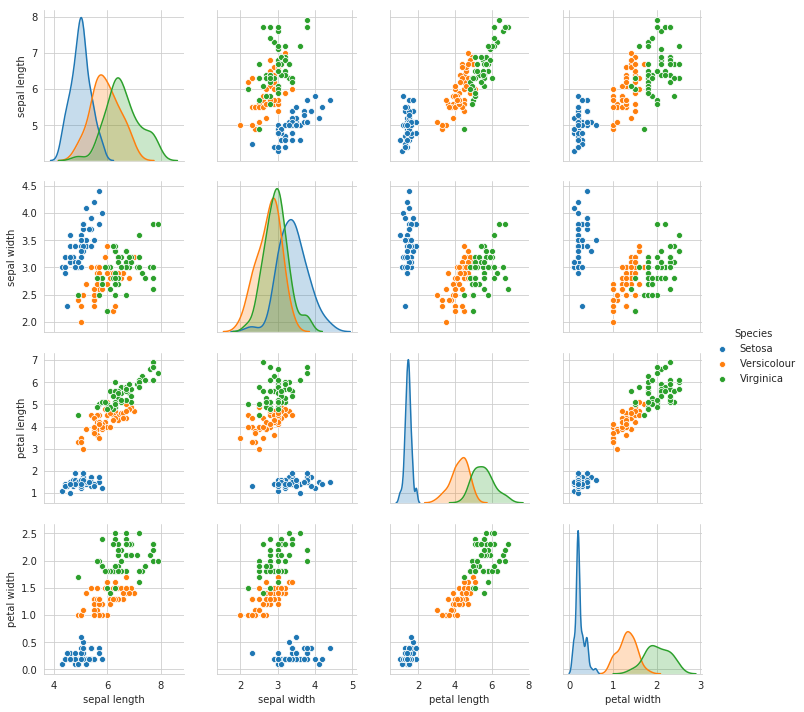

In [17]:
sns.pairplot(iris,hue = "Species")

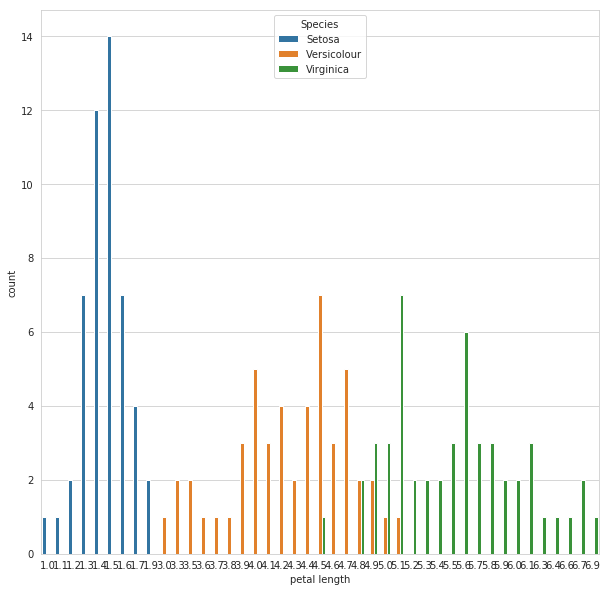

In [30]:
plt.subplots(figsize=(10,10))
sns.countplot("petal length",data = iris, hue = "Species")

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [32]:
logreg = LogisticRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 3)

In [33]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
from sklearn import metrics

In [35]:
Y_pred = logreg.predict(X_test)

In [36]:
print(metrics.accuracy_score(Y_pred,Y_test))

0.9333333333333333


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=6)

In [40]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [41]:
Y_pred = knn.predict(X_test)

In [42]:
print(metrics.accuracy_score(Y_pred,Y_test))

0.95


In [43]:
knn = KNeighborsClassifier(n_neighbors=1)

In [44]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [45]:
Y_pred = knn.predict(X_test)

In [46]:
print(metrics.accuracy_score(Y_pred,Y_test))

0.9666666666666667


In [47]:
K_range = range(1,21)

accuracy = []    

In [48]:
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_pred,Y_test))

Text(0,0.5,'Testing accuracy')

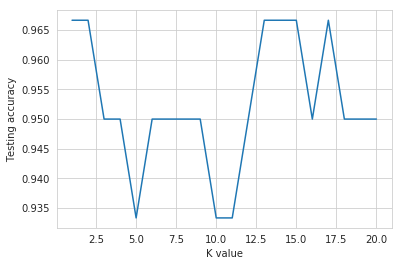

In [49]:
plt.plot(K_range,accuracy)
plt.xlabel("K value")
plt.ylabel("Testing accuracy")